# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

#수업시간에 배운 CNN을 이용하여 이미지를 분류해 보자!!!


데이터 셋 정보: http://yann.lecun.com/exdb/mnist/

## MNIST 데이터 셋 읽어오기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt



(train_input, train_target), (test_input, test_target) = \
    keras.datasets.mnist.load_data()


##로드한 데이터의 shape을 확인하시오 (샘플 수: 60000, 28 x 28).
##데이터 셋의 클래스 수를 확인하시오 (numpy unique() 활용 - 7일차 교육 MNIST 실습의 데이터 준비 슬라이드 참고)

## 이미지에 깊이 1을 추가하고, 픽셀값을 0~1값으로 정규화하시오


In [1]:
#이미지 정규화 (전체 픽셀을 각각 255.0로 나눔)

##데이터 세트를 훈련데이터 (80%)와 검증세트로 분리하시오

#분류가 잘 되었는지 확인하시오 (훈련 세트 = 40000, 검증세트 = 10000)

In [2]:
#shape를 출력

## matplotlib의 imshow() 메소드를 사용하여 정규화된 훈련세트의 5번째 인덱스의 이미지를 color bar와 함께 출력하시오. 

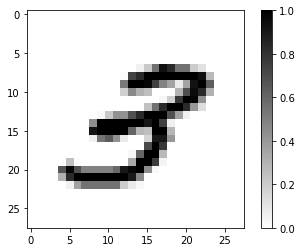

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_scaled[5].reshape(28,28), cmap="gray_r") #변수명은 변경 가능
plt.colorbar()
plt.show()

## 합성곱 신경망 만들기

In [ ]:
model = keras.Sequential()

##첫번째 합성곱 층을 생성후 모델에 추가하시오.
필터 수: 32개\
필터 (커널) 사이즈: 3 x 3 x 1\
활성화 함수: ReLU\
패딩: same padding\
stride: 1\
input_shape는 데이터 특성에 맞게 지정

## 2x2 최대 풀링 (max pooling) 층을 추가하시오

##두번째 합성곱 층을 생성 후 모델에 추가하시오
필터 수: 64개\
필터 (커널) 사이즈: 3 x 3 x 32\
활성화 함수: ReLU\
패딩: same padding\
stride: 1

## 2x2 최대 풀링 (max pooling) 층을 추가하시오.
stride: 2

## Flatten 층을 추가하고, 출력을 위한 Dense 층 두개를 추가하시오.
## Flatten 층과 첫번째 Dense 층 사이에 Dropout 층을 추가하시오 (Dropout율: 30%) 
첫번째 Dense 층의 뉴런 갯수: 100개\
첫번째 Dense 층의 활성화 함수: ReLU\
두번째 Dense 층의 뉴런 갯수: 데이터 특성에 맞게 설정\
두번째 Dense 층의 활성화 함수: Softmax


##model.summary()를 사용하여 모델이 잘 구성되었는지 확인

##utils.plot_model()을 사용하여 모델이 잘 구성되었는지 확인

## 모델 컴파일과 훈련
optimizer: adam\
손실함수: 다중분류를 위한 함수로 지정\
accuracy 메트릭 추가

In [3]:
#accuracy는 매개변수를 통해 별도 추가


## ModelCheckPoint 콜백 및 Early_stopping 콜백 사용을 사용하여 최적의 모델을 찾고 저장하시오.
##에포크는 적당히 큰 값으로 설정 (예: 30)
## patience: 2

In [4]:
##modelCheckPoint 콜백과 Early_stopping 콜백은 리스트로 동시에 전달 가능

## matplotlib를 사용하여 학습 세트와 검증세트의 Loss율을 확인하시오.

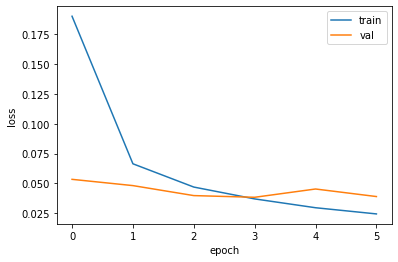

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## model.evaluate()를 사용하여 검증 세트에 대한 성능을 측정하시오

##검증세트의 두번째 (인덱스 1) 이미지 출력

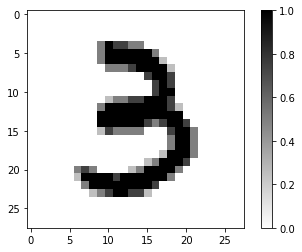

In [ ]:
plt.imshow(val_scaled[1].reshape(28,28), cmap='gray_r')
plt.colorbar()
plt.show()

## 검증세트 두번째 (인덱스 1) 샘플의 예측결과를 확인

In [5]:
#predict()메소드를 사용하면 됩니다. 수업자료 참고

## 위 예측결과를 그래프로 출력 후 확인

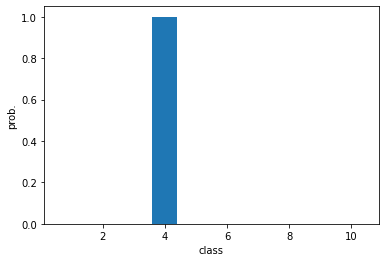

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five',
           'Six', 'Seven', 'Eight', 'Nine']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

Three


##테스트 세트에 대한 성능을 평가해보자 (evaluate() 사용)

In [6]:
#테스트 데이터도 정규화가 필요합니다.
#성능평가시 evaluate()를 사용합니다.